# Phase II

In [6]:
import soundfile as sf

def caracteristique(fich):
    info = sf.info(fich) 
    print(f"Nombre d'échantillons: {info.frames}")
    print(f"Fréquence d'échantillonnage: {info.samplerate}Hz")
    print(f"Nombre de stéréo: {info.channels}")
    print(f"Encodeur: {info.format}")
    
def qualite(fich):
    info=sf.info(fich)
    if info.samplerate > 44100:
        print("Le fichier audio est de qualité HD car Fe > 44,1kHz")
    else:
        print("Le fichier audio est de qualité SD car Fe <= 44,1kHz")
        
def sortie(fich):
    data, samplerate = sf.read(fich)
    
    if data.ndim==1:
        gauche = data 
        droite = data
        return gauche, droite
    else:
        gauche = data[:, 0]
        droite = data[:, 1]
        return gauche, droite
        
def spectreAmpl(fich):
    gauche, droite = sortie(fich)
    Fe = sf.info(fich).samplerate
    
    tg = arange(0, (1/Fe)*len(gauche), 1/Fe)
    td = arange(0, (1/Fe)*len(droite), 1/Fe)

    figure(figsize = (20, 5))
    subplot(121)
    plot(gauche, "b-")
    title("Signal gauche")
    grid()
    subplot(122)
    plot(droite, "r-")
    title("Signal droite")
    grid()
    
def plotFreq(fich):
    """Trace le spectre d'amplitude du signal sig, qui est échantillonné à fe Hz. c indique la couleur souhaité (ex : 'b' pour bleu). titre indique le titre."""
    gauche, droite = sortie(fich)
    fe = sf.info(fich).samplerate
    longueurG=len(gauche)
    specOrig=abs((1/longueurG)*fftshift(fft(gauche)))
    freqG = arange(-fe/2,fe/2,fe/longueurG) 
    style = 'r-'
    #display(style)
    subplot(121)
    plot(freqG, specOrig,style)
    grid()
    title('Spectre Gauche', fontsize=16)
    xlim([-fe/32, fe/32])
    xlabel('fréquence (Hz)', fontsize=16)
    ylabel('Amplitude', fontsize=16)
    
    
    longueurD=len(droite)
    specOrig=abs((1/longueurD)*fftshift(fft(droite)))
    freqD = arange(-fe/2,fe/2,fe/longueurD) 
    style = 'b-'
    #display(style)
    subplot(122)
    plot(freqD, specOrig,style)
    grid()
    title('Spectre Droit', fontsize=16)
    xlim([-fe/32, fe/32])
    xlabel('fréquence (Hz)', fontsize=16)
    ylabel('Amplitude', fontsize=16)
    
def extraction(fich, temps):
    types = fich.replace(".", " ")
    test = types.split()
    assert test[-1] == "flac", ("Cette fonction est réservée au fichier audio de types flac")
    data, samplerate = sf.read(fich)
    return data[0:temps*samplerate]
    
def flacModif(fich, temps):
    types = fich.replace(".", " ")
    test = types.split()
    sf.write('extrait_'+test[0]+'_'+str(temps)+'s.flac', extraction(fich,temps), sf.read(fich)[1])

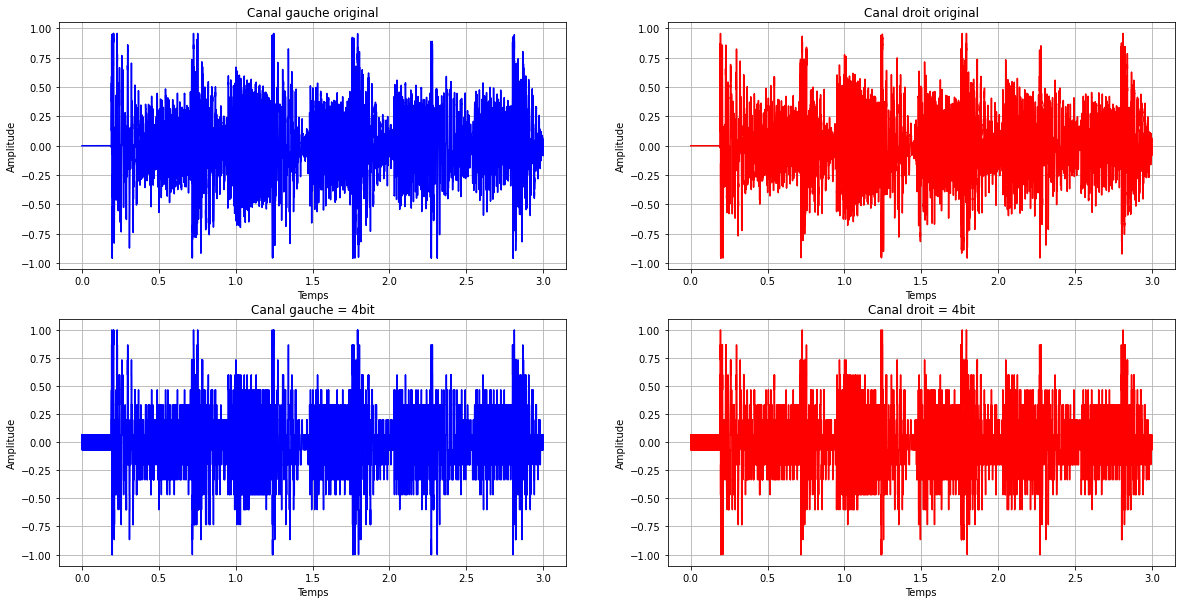

In [15]:
from util_TP206_v2 import *     
from pylab import *            
from sounddevice import *      
from soundfile import *  

def quantifA(fich, n):
    
    gauche, droite = sortie(fich)
    Fe = sf.info(fich).samplerate
    
    tg = arange(0, (1/Fe)*len(gauche), 1/Fe)
    td = arange(0, (1/Fe)*len(droite), 1/Fe)
    
    qng, d = uniform_quantizer(gauche, 2**n, -1, 1)
    qnd, d = uniform_quantizer(droite, 2**n, -1, 1)


    figure(figsize = (20, 10))
    
    subplot(221)
    plot(tg, gauche, "b-")
    title("Canal gauche original")
    xlabel("Temps")
    ylabel("Amplitude")
    grid()
    subplot(222)
    plot(td, droite, "r-")
    title("Canal droit original")
    xlabel("Temps")
    ylabel("Amplitude")
    grid()
    
    subplot(223)
    plot(tg, qng, "b-")
    title(f"Canal gauche = {n}bit")
    xlabel("Temps")
    ylabel("Amplitude")
    grid()
    subplot(224)
    plot(td, qnd, "r-")
    title(f"Canal droit = {n}bit")
    xlabel("Temps")
    ylabel("Amplitude")
    grid()


flacModif("AJS_short.flac", 3)
quantifA("extrait_AJS_short_3s.flac", 4)


In [2]:
def plotFreq(fich, n):
    """Trace le spectre d'amplitude du signal sig, qui est échantillonné à fe Hz. c indique la couleur souhaité (ex : 'b' pour bleu). titre indique le titre."""
    gauche, droite = sortie(fich)
    fe = sf.info(fich).samplerate
    qng, d = uniform_quantizer(gauche, 2**n, -1, 1)
    qnd, d = uniform_quantizer(droite, 2**n, -1, 1)
    
    #gauche
    longueurG=len(gauche)
    specOrig=abs((1/longueurG)*fftshift(fft(gauche)))
    freqG = arange(-fe/2,fe/2,fe/longueurG) 
    
    #droite
    longueurD=len(droite)
    specOrigd=abs((1/longueurD)*fftshift(fft(droite)))
    freqD = arange(-fe/2,fe/2,fe/longueurD)  
    
    #gauche quantifié
    longueurGq=len(qng)
    specOrigq=abs((1/longueurGq)*fftshift(fft(qng)))
    freqGq = arange(-fe/2,fe/2,fe/longueurGq)
    
    #droite quantifié
    longueurDq=len(qnd)
    specOrigdq=abs((1/longueurDq)*fftshift(fft(qnd)))
    freqDq = arange(-fe/2,fe/2,fe/longueurDq)
    
    
    #display(style)
    figure(figsize = (20, 10))
    
    #gauche
    subplot(221)
    plot(freqG, specOrig, "b-")
    grid()
    title('Spectre Gauche Original', fontsize=16)
    xlim([-fe/64, fe/64])
    xlabel('fréquence (Hz)', fontsize=16)
    ylabel('Amplitude', fontsize=16)
    
    
    #droite
    subplot(222)
    plot(freqG, specOrigd, "r-")
    grid()
    title('Spectre Droit Original', fontsize=16)
    xlim([-fe/64, fe/64])
    xlabel('fréquence (Hz)', fontsize=16)
    ylabel('Amplitude', fontsize=16)
    
    #gauche quantifié
    subplot(223)
    plot(freqGq,specOrigq, "b-")
    title(f"Canal gauche = {n}bit")
    xlim([-fe/64, fe/64])
    xlabel('fréquence (Hz)', fontsize=16)
    ylabel('Amplitude', fontsize=16)
    grid()
    
    #droite quantifié
    subplot(224)
    plot(freqDq, specOrigdq, "r-")
    title(f"Canal droit = {n}bit")
    xlim([-fe/64, fe/64])
    xlabel('fréquence (Hz)', fontsize=16)
    ylabel('Amplitude', fontsize=16)
    grid()
    
    
    
    
plotFreq("extrait_AJS_short_3s.flac", 4)

LibsndfileError: Error opening 'extrait_AJS_short_3s.flac': System error.

In [3]:
def snr(s, sq):
    Ps=norm(s,2)**2/len(s)
    erreur=norm((s-sq),2)**2/len(s)
    return (10*log10(Ps/erreur))

In [4]:
def comparaison(fich):
    nb = fich
    n = int(input("Choisir le nombre de bits pour la quantification : "))
    gauche, droite = sortie(nb)
    Fe = sf.info(nb).samplerate
    
    qng, d = uniform_quantizer(gauche, 2**n, -1, 1)
    qnd, d = uniform_quantizer(droite, 2**n, -1, 1)
        
    if around(snr(gauche, qng)) != around(snr(droite, qnd)):
        print(f"Le signal quantifié sur {n} bits permet de considérer que la qualité auditive N’EST PAS satisfaisante pour ce fichier HD")
    else:
        print(f"Le signal quantifié sur {n} bits permet de considérer que la qualité auditive EST satisfaisante pour ce fichier HD")

    r = int(input("1 : Jouer le son original vs quantifié \n2 : Afficher le signal original vs quantifié \n3 : Afficher le spectre original vs quantifié \n4 : Afficher le rapport signal bruit entre l'original et quantifié  \n5 : Afficher toutes les comparaisons entre le son original et quantifié \n"))
    if r == 1:
        wait(play(gauche, Fe))
        wait(play(qng, Fe))
    
    if r == 2:
        quantifA(fich, n)
    
    if r == 3:
        plotFreq(fich, n)
    
    if r == 4:
        rapportg = snr(gauche, qng)
        rapportd = snr(droite, qnd)
        
        print(f"Le rapport signal à bruit de quantification entre le signal du canal gauche et son signal quantifié est de {around(rapportg)}dB")     
        print(f"Le rapport signal à bruit de quantification entre le signal du canal droit et son signal quantifié est de {around(rapportd)}dB")

    
    if r == 5:
        wait(play(gauche, Fe))
        wait(play(qng, Fe))
        
        quantifA(fich, n)
        
        plotFreq(fich, n)
        
        print(f"Le rapport signal à bruit de quantification entre le signal du canal gauche et son signal quantifié est de {around(snr(gauche, qng))}dB")     
        print(f"Le rapport signal à bruit de quantification entre le signal du canal droit et son signal quantifié est de {around(snr(droite, qnd))}dB")


comparaison("extrait_AJS_short_3s.flac")

Choisir le nombre de bits pour la quantification : 3


LibsndfileError: Error opening 'extrait_AJS_short_3s.flac': System error.

On peut en deduire que lorsque que l'écart entre le rapport signal à bruit de quantification du canal droit et son signal quantifié ET le canal gauche et son signal quantifié est supérieur à 1, la qualité du fichier audio ne sera plus acceptable si il est HD. C'est à partir d'une quantification sur 4bits qu'on commencera à apercevoir ce dit écart.